In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix


In [3]:
# veriyi okuyorum
data=pd.read_csv("C:\\Users\\Merve\\Desktop\\data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


1) ID number

2) Diagnosis(teşhis) (M = malignant, B = benign)


a) radius (merkezden çevre üzerindeki noktalara olan mesafelerin ortalaması)

b) texture doku (gri tonlama değerlerinin standart sapması)

c) perimeter (çevre)

d) area (alan)

e) smoothness -pürüzsüzlük (yarıçap uzunluklarında yerel değişiklik)

f) compactness -kompaktlık(perimeter^2 / area - 1.0)

g) concavity (içbükeylik )

h) concave points (içbükey noktalar)

i) symmetry (simetri)

j) fractal dimension (fraktal boyut )

Bu özelliklerin ortalaması, standart hatası ve "en kötü" veya en büyüğü (en büyük üç değerin ortalaması), her görüntü için hesaplandı ve
sonuçta 30 özellik elde edildi. Örneğin, alan 3 Ortalama Yarıçap, alan
13 Yarıçap SE, alan 23 En Kötü Yarıçaptır.

Tüm özellik değerleri, dört anlamlı basamakla yeniden kodlanır.

Eksik özellik değerleri: yok

Sınıf dağılımı: 357 iyi huylu, 212 kötü huylu

In [4]:
data.describe


<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [5]:
data.shape
# kaç adet verim ve özelliğim var bakıyorum

(569, 33)

In [6]:
data.info()  
#hiç boş verim yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.drop(['Unnamed: 32', 'id'], axis=1,inplace=True)
# kullanmayacağım gereksiz sütunları siliyorum ve kalıcı olmasını sağlıyorum

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# tümör türlerimi 0-1 şekline dönüştürüyorum
#görselleştirebilmek ve analiz edebilmek için 
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


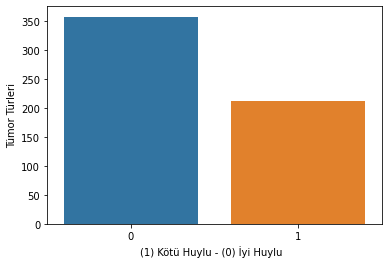

In [10]:
#iyi huylu ve kötü huylu tümor türlerinin kaç adet olduğunu görmek için görselleştiriyorum
plt.figure()
sns.countplot(data['diagnosis'],label="Count")
plt.ylabel("Tümor Türleri")
plt.xlabel("(1) Kötü Huylu - (0) İyi Huylu  ")
plt.show()

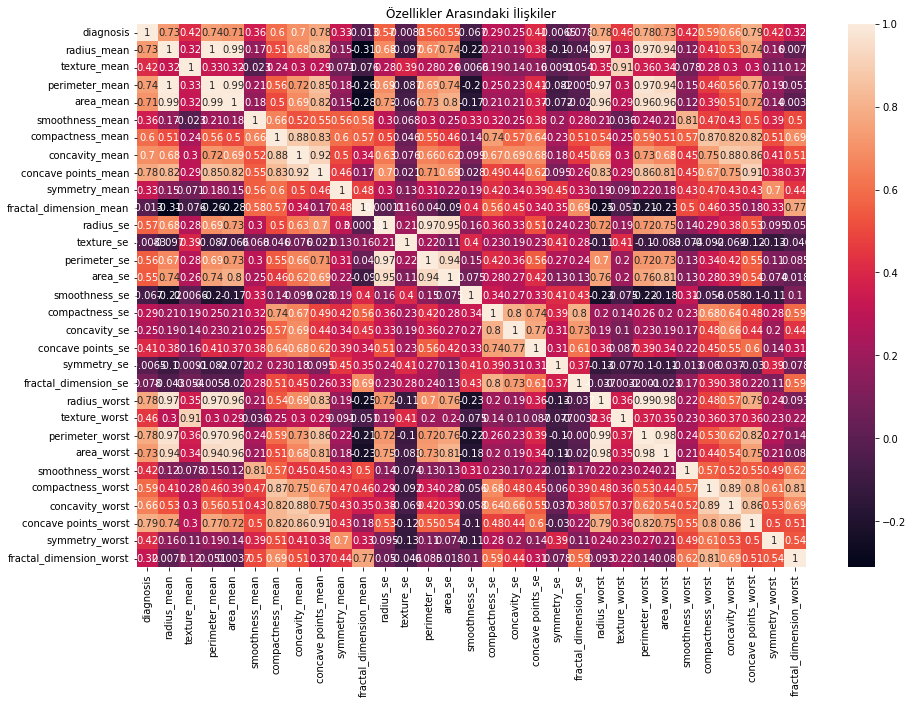

In [11]:
corr_matrisi=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrisi,annot=True)
plt.title("Özellikler Arasındaki İlişkiler")
plt.show()

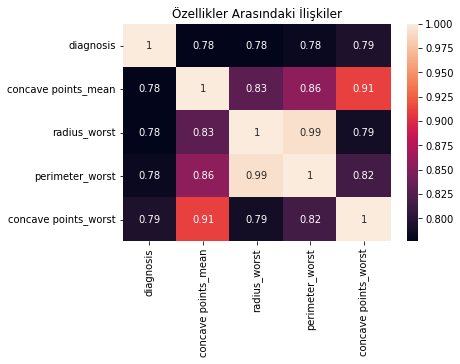

In [12]:
# sadece diagnosis ile aralarındaki ilişki yüksek olanlara bakalım
esik_deger=0.75 #olsun dedim
filtre=np.abs(corr_matrisi["diagnosis"])>esik_deger
#eşik değerden büyük olanlar için bir filtre oluşturdum
corr=corr_matrisi.columns[filtre].tolist()
#filtrelediklerimi listeyte aktardım
plt.figure()
sns.heatmap(data[corr].corr(),annot=True)
plt.title("Özellikler Arasındaki İlişkiler")
plt.show()

In [13]:
data.count()

diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

In [14]:
Q1=data.quantile(0.25) #1. çeyrek
Q3=data.quantile(0.75) #3. çeyrek
IQR=Q3-Q1
alt_sınır=Q1 - 1.5 * IQR
ust_sınır=Q3 + 1.5 * IQR


In [15]:
clean_data = data[~((data < alt_sınır) |(data > ust_sınır)).any(axis=1)]
#alt sınırdan küçük ve üst sınırdan büyük olanlar DIŞINDAKİLERİ aldık
#yani aykırı değerleri silmiş olduk
clean_data.shape  

(398, 31)

In [16]:
clean_data.count()

diagnosis                  398
radius_mean                398
texture_mean               398
perimeter_mean             398
area_mean                  398
smoothness_mean            398
compactness_mean           398
concavity_mean             398
concave points_mean        398
symmetry_mean              398
fractal_dimension_mean     398
radius_se                  398
texture_se                 398
perimeter_se               398
area_se                    398
smoothness_se              398
compactness_se             398
concavity_se               398
concave points_se          398
symmetry_se                398
fractal_dimension_se       398
radius_worst               398
texture_worst              398
perimeter_worst            398
area_worst                 398
smoothness_worst           398
compactness_worst          398
concavity_worst            398
concave points_worst       398
symmetry_worst             398
fractal_dimension_worst    398
dtype: int64

In [17]:
from sklearn import preprocessing
preprocessing.scale(clean_data)# tüm değişkenleri standartlaştırdı

array([[ 1.74963553,  1.96446135,  0.37737666, ...,  1.94101971,
         0.62569152,  0.33309218],
       [ 1.74963553,  0.13454011,  0.5949777 , ...,  1.18759204,
         0.93155151,  2.8540759 ],
       [ 1.74963553,  1.06562338,  1.21194062, ...,  0.06847141,
         0.36122611,  0.40048958],
       ...,
       [-0.57154761,  0.4892385 ,  1.06857994, ...,  0.28387958,
        -1.22556631,  0.04103678],
       [-0.57154761,  0.27158267,  2.21290537, ...,  0.16966315,
        -1.24396391,  0.29538173],
       [ 1.74963553,  1.29940186,  2.4509865 , ...,  0.91106805,
        -1.31755428, -0.10659563]])

In [18]:

y=clean_data.diagnosis # bağımlı değişeken
x=clean_data.drop(["diagnosis"],axis=1) # bağımsız değişkenler

## Standardizasyon

In [19]:

# veri setimi eğitim ve test olarak ayırıyorum
X_egitim, X_test,Y_egitim, Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
#sonrasında verilerimi standardize ediyorum
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_egitim=scaler.fit_transform(X_egitim)
X_test=scaler.transform(X_test)

## KNN

In [25]:
knn=KNeighborsClassifier(n_neighbors=2)# model nesnesini oluşturdum
knn.fit(X_egitim,Y_egitim)# modeli eğittim

KNeighborsClassifier(n_neighbors=2)

In [26]:
y_pred=knn.predict(X_test)# tahmin ürettim

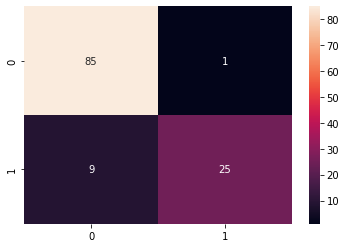

In [27]:
#modelin karmaşıklık matrisini oluşturalım
karmaşıklık_matrisi=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [28]:
# modelimin doğruluk değeri

dogruluk=accuracy_score(Y_test,y_pred)
dogruluk


0.9166666666666666

In [29]:
print('Classification Report:\n', classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        86
           1       0.96      0.74      0.83        34

    accuracy                           0.92       120
   macro avg       0.93      0.86      0.89       120
weighted avg       0.92      0.92      0.91       120



## DecisionTree

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=6)# model nesnesi oluşturduk
classifier.fit(X_egitim,Y_egitim)#modeli eğittik

DecisionTreeClassifier(max_depth=6)

In [31]:
y_pred=classifier.predict(X_test)#tahmin oluşturduk

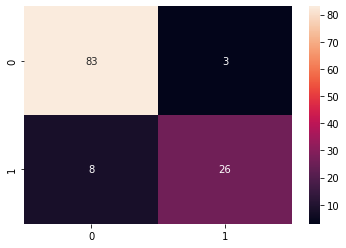

In [32]:
#modelin karmaşıklık matrisini oluşturalım
karmaşıklık_matrisi=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [33]:
# modelimin doğruluk değeri

dogruluk=accuracy_score(Y_test,y_pred)
dogruluk


0.9083333333333333

In [34]:
print('Classification Report:\n', classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.90      0.76      0.83        34

    accuracy                           0.91       120
   macro avg       0.90      0.86      0.88       120
weighted avg       0.91      0.91      0.91       120



## LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
classifer=LogisticRegression()
classifer.fit(X_test,Y_test)

LogisticRegression()

In [36]:
y_pred=classifer.predict(X_test)


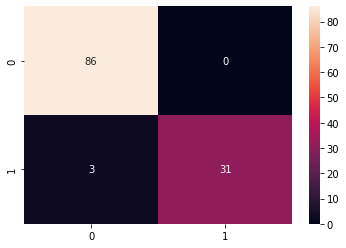

In [37]:
karmaşıklık_matrisi=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [38]:
dogruluk=accuracy_score(Y_test,y_pred)
dogruluk


0.975

## Support Vector Machine


In [39]:
from sklearn.svm import SVC  
classifer=SVC(kernel="linear")# model nesnesi oluşturduk
classifer.fit(X_egitim,Y_egitim)# modeli eğittik


SVC(kernel='linear')

In [40]:
y_pred=classifer.predict(X_test)#tahmin ettik

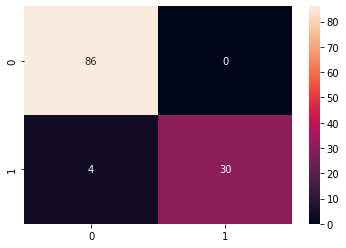

In [41]:
#modelin karmaşıklık matrisini oluşturalım
karmaşıklık_matrisi=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [42]:
dogruluk=accuracy_score(Y_test,y_pred)
dogruluk


0.9666666666666667

## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
classifier=GaussianNB()
classifier.fit(X_egitim,Y_egitim)

GaussianNB()

In [45]:
y_pred=classifier.predict(X_test)


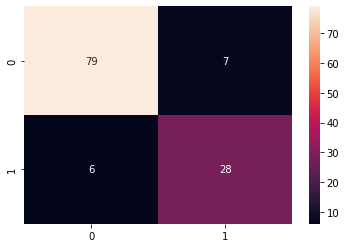

In [46]:
#modelin karmaşıklık matrisini oluşturalım
karmaşıklık_matrisi=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [47]:
dogruluk=accuracy_score(Y_test,y_pred)
dogruluk


0.8916666666666667

##  Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
classifier=RandomForestClassifier()# model nesnesini oluşturduk
classifier.fit(X_egitim,Y_egitim)#modeli eğittik

RandomForestClassifier()

In [50]:
y_predict=classifier.predict(X_test)

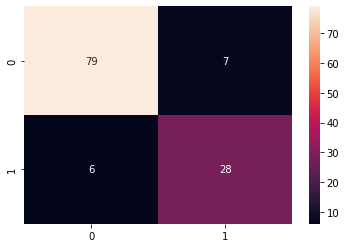

In [51]:
#modelin karmaşıklık matrisini oluşturalım
karmaşıklık_matrisi=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [52]:
dogruluk=accuracy_score(Y_test,y_pred)
dogruluk


0.8916666666666667

In [ ]:
precision_score(y_true, y_pred, average='macro')